In [1]:
%load_ext autotime
import geopandas as gpd
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
tqdm.pandas()
from glob import glob
import os
from shapely import line_interpolate_point, Point
pd.set_option('display.max_columns', None)
files = sorted(glob("Profiles_T3_T7/*"))
files

['Profiles_T3_T7/POETTO_2017_01_25_T7.csv',
 'Profiles_T3_T7/POETTO_2017_04_06_T3.CSV',
 'Profiles_T3_T7/POETTO_2017_04_06_T7.CSV',
 'Profiles_T3_T7/POETTO_2018_10_09_T3.CSV',
 'Profiles_T3_T7/POETTO_2018_10_09_T7.CSV',
 'Profiles_T3_T7/POETTO_2018_10_09_T7_Modified.txt',
 'Profiles_T3_T7/POETTO_2018_10_09_T7_Modifiedd.txt',
 'Profiles_T3_T7/POETTO_2018_10_19_T3.CSV',
 'Profiles_T3_T7/POETTO_2018_10_19_T7.CSV',
 'Profiles_T3_T7/POETTO_2019_05_21_T3.CSV',
 'Profiles_T3_T7/POETTO_2019_05_21_T7.CSV',
 'Profiles_T3_T7/POETTO_2020_01_20_T3.CSV',
 'Profiles_T3_T7/POETTO_2020_01_20_T7.CSV',
 'Profiles_T3_T7/POETTO_2020_01_27_T3.CSV',
 'Profiles_T3_T7/POETTO_2020_01_27_T7.CSV',
 'Profiles_T3_T7/POETTO_2020_03_28_T3.csv',
 'Profiles_T3_T7/POETTO_2020_03_28_T7.csv',
 'Profiles_T3_T7/POETTO_2020_05_04_T3.CSV',
 'Profiles_T3_T7/POETTO_2020_05_04_T7.CSV',
 'Profiles_T3_T7/POETTO_2022_11_21_NEWEST.csv',
 'Profiles_T3_T7/POETTO_2022_11_21_NEWEST_v2.csv',
 'Profiles_T3_T7/POETTO_2022_11_21_T3.CSV',
 '

In [2]:
transects = gpd.read_file("transects_extended.geojson").set_index("id")
transects

,site_id,orientation,along_dist,along_dist_norm,beach_slope,cil,ciu,trend,n_points,n_points_nonan,r2_score,mae,mse,rmse,intercept,ERODIBILITY,geometry
id,,,,,,,,,,,,,,,,,
aus0001-0000,aus0001,104.347648,0.000000,0.000000,0.085,0.0545,0.2000,-1.456305,654.0,342.0,0.131951,28.721214,1321.059410,36.346381,179.407277,None,"LINESTRING (153.26555 -24.7007, 153.26938 -24...."
aus0001-0001,aus0001,93.495734,98.408334,0.002935,0.050,0.0387,0.0640,-0.833581,654.0,473.0,0.052783,26.029482,1092.336862,33.050520,210.629160,None,"LINESTRING (153.26525 -24.7019, 153.2692 -24.7..."
aus0001-0002,aus0001,82.069341,198.408334,0.005918,0.050,0.0428,0.0647,-0.282209,654.0,491.0,0.008220,22.896464,838.997233,28.965449,200.166307,None,"LINESTRING (153.26539 -24.70316, 153.26931 -24..."
aus0001-0003,aus0001,81.192757,298.402523,0.008900,0.055,0.0480,0.0659,0.089340,654.0,502.0,0.000987,20.770475,691.179232,26.290288,185.295473,None,"LINESTRING (153.26555 -24.70408, 153.26945 -24..."
aus0001-0004,aus0001,81.065473,398.402523,0.011882,0.075,0.0614,0.0922,0.361437,654.0,508.0,0.017461,19.528839,637.676213,25.252252,169.027861,None,"LINESTRING (153.2657 -24.70497, 153.26961 -24...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sar2538-0004,sar2538,NaN,NaN,NaN,NaN,NaN,NaN,-0.072765,1220.0,1220.0,0.159922,1.468474,3.900855,1.975058,244.639331,Low,"LINESTRING (9.33568 41.29334, 9.33294 41.29629)"
sar2539-0000,sar2539,NaN,NaN,NaN,NaN,NaN,NaN,0.094468,388.0,378.0,0.023321,2.795524,24.861725,4.986153,214.008472,Low,"LINESTRING (9.40022 41.3002, 9.40172 41.30362)"
sar2539-0001,sar2539,NaN,NaN,NaN,NaN,NaN,NaN,0.161493,388.0,376.0,0.058879,3.099783,27.664877,5.259741,191.216499,Low,"LINESTRING (9.39917 41.3019, 9.4035 41.30039)"


In [3]:
intersects = pd.read_csv("data/sar0941/transect_time_series.csv")
intersects.dates = pd.to_datetime(intersects.dates)
transect_id = 'sar0941-0000'
intersects[transect_id] = gpd.GeoSeries(line_interpolate_point(transects.geometry.to_crs(3003)[transect_id], intersects[transect_id]), crs=3003)

In [4]:
intersects["timediff"] = (intersects.dates - pd.to_datetime("2017-01-25 00:00:00+00:00")).abs()
intersects.sort_values("timediff")

,dates,satname,sar0941-0000,sar0941-0001,sar0941-0002,sar0941-0003,sar0941-0004,sar0941-0005,sar0941-0006,sar0941-0007,timediff
767,2017-01-25 10:06:38+00:00,L8,POINT (1515236.007 4340431.221),202.61,200.94,195.35,204.47,202.22,207.47,200.08,0 days 10:06:38
768,2017-01-26 10:02:22+00:00,L7,POINT (1515236.588 4340430.275),203.36,206.11,204.49,NaN,NaN,-55.21,NaN,1 days 10:02:22
766,2017-01-09 10:06:43+00:00,L8,POINT (1515240.141 4340424.489),209.10,203.17,201.10,208.10,211.57,211.66,204.62,15 days 13:53:17
769,2017-02-11 10:02:16+00:00,L7,None,NaN,192.32,189.09,NaN,NaN,NaN,196.77,17 days 10:02:16
765,2017-01-02 10:00:33+00:00,L8,POINT (1515240.225 4340424.352),212.48,206.36,199.93,208.57,211.48,216.35,207.86,22 days 13:59:27
...,...,...,...,...,...,...,...,...,...,...,...
4,1984-06-07 09:34:42+00:00,L5,POINT (1515224.856 4340449.381),181.85,175.61,185.80,189.06,192.88,200.27,188.61,11919 days 14:25:18
3,1984-05-31 09:28:23+00:00,L5,POINT (1515225.814 4340447.821),181.54,176.86,179.99,182.05,188.07,188.85,181.16,11926 days 14:31:37
2,1984-05-06 09:33:51+00:00,L5,POINT (1515226.431 4340446.816),179.34,175.95,175.88,179.33,183.80,185.50,182.47,11951 days 14:26:09
1,1984-04-29 09:27:29+00:00,L5,POINT (1515220.801 4340455.985),172.37,172.57,176.45,185.43,182.83,190.28,170.60,11958 days 14:32:31


In [5]:
df = pd.read_csv(files[0], sep=";", names=["lat", "lng", "elevation"])
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lng, df.lat), crs=32632)
m = df.explore("elevation")
gpd.GeoSeries(intersects[transect_id])[intersects.dates == "2017-01-25 10:06:38+00:00"].explore(m=m)

In [6]:
results = []
for f in files:
    date = f[22:32]
    site = f[33:35]
    try:
        df = pd.read_csv(f, sep=";", names=["lat", "lng", "elevation"], index_col=False)
        df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lng, df.lat), crs=32632)
        closest_to_zero = df.loc[df.elevation.abs().idxmin()]
        zero_dist_from_origin = closest_to_zero.geometry.distance(df.geometry[0])
        results.append({
            "date": date,
            "site": site,
            "lat": closest_to_zero.lat,
            "lng": closest_to_zero.lng,
            "origin_lat": df.lat[0],
            "origin_lng": df.lng[0],
            "dist_from_origin": zero_dist_from_origin,
        })
    except Exception as e:
        pass
        #print(f"Error processing {f}: {e}")
df = pd.DataFrame(results)
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lng, df.lat), crs=32632)
df.date = pd.to_datetime(df.date, format="%Y_%m_%d")
display(df)
m = df.explore("date")
gpd.GeoSeries(intersects[transect_id]).explore(m=m, name="CoastSat")

/tmp/ipykernel_120504/580355017.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(f, sep=";", names=["lat", "lng", "elevation"], index_col=False)
/tmp/ipykernel_120504/580355017.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(f, sep=";", names=["lat", "lng", "elevation"], index_col=False)
/tmp/ipykernel_120504/580355017.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(f, sep=";", names=["lat", "lng", "elevation"], index_col=False)
/tmp/ipykernel_120504/580355017.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(f, sep=";", names=["lat", "lng", "elevation"], index_col=False)
/tmp/ipykernel_120504/58

,date,site,lat,lng,origin_lat,origin_lng,dist_from_origin,geometry
0,2017-01-25,T7,4.340424e+06,5.151969e+05,4.340509e+06,5.151222e+05,113.079058,POINT (515196.873 4340423.946)
1,2017-04-06,T3,4.339304e+06,5.141535e+05,4.339361e+06,5.140721e+05,99.207874,POINT (514153.475 4339303.745)
2,2017-04-06,T7,4.340489e+06,5.152691e+05,4.340568e+06,5.152032e+05,102.801208,POINT (515269.098 4340489.127)
3,2018-10-09,T3,4.339308e+06,5.141481e+05,4.339360e+06,5.140721e+05,92.041522,POINT (514148.057 4339308.309)
4,2018-10-09,T7,4.340426e+06,5.151954e+05,4.340508e+06,5.151228e+05,109.840753,POINT (515195.423 4340425.996)
5,2018-10-19,T3,4.340427e+06,5.151937e+05,4.340509e+06,5.151234e+05,108.133586,POINT (515193.652 4340427.018)
6,2018-10-19,T7,4.340427e+06,5.151937e+05,4.340509e+06,5.151234e+05,108.133586,POINT (515193.652 4340427.018)
7,2019-05-21,T7,4.340428e+06,5.151926e+05,4.340500e+06,5.151305e+05,94.553710,POINT (515192.621 4340428.413)
8,2020-01-20,T3,4.339322e+06,5.141470e+05,4.339360e+06,5.140717e+05,84.249587,POINT (514146.986 4339322.318)
9,2020-01-20,T7,4.340427e+06,5.151928e+05,4.340510e+06,5.151242e+05,107.846638,POINT (515192.758 4340426.506)


In [7]:
transects.to_crs(df.crs).distance(df.geometry[0]).idxmin(), transects.to_crs(df.crs).distance(df.geometry[1]).idxmin()

/home/nyou045/CoastSat/.venv/lib/python3.12/site-packages/shapely/measurement.py:72: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
/home/nyou045/CoastSat/.venv/lib/python3.12/site-packages/shapely/measurement.py:72: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)


('sar0941-0000', 'sar0939-0000')

In [8]:
T7_offset = Point(df.origin_lng[0], df.origin_lat[0]).distance(Point(transects.geometry.to_crs(df.crs)["sar0941-0000"].coords[0]))
T7_offset

87.98933048805033

In [9]:
T3_offset = Point(df.origin_lng[1], df.origin_lat[1]).distance(Point(transects.geometry.to_crs(df.crs)["sar0939-0000"].coords[0]))
T3_offset

101.37974964880803

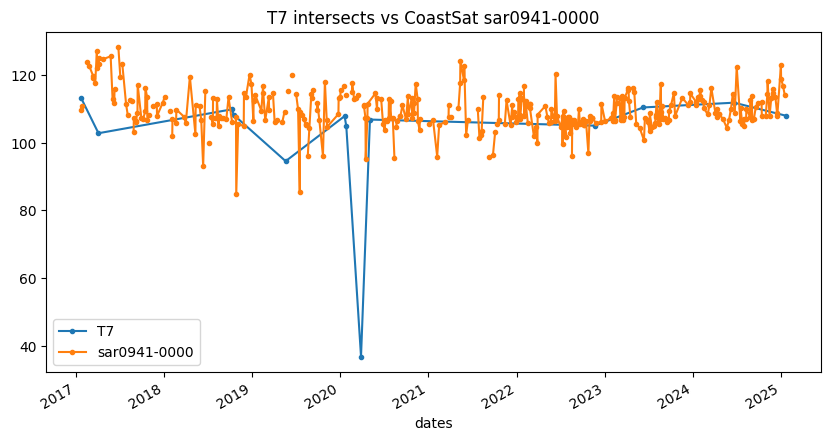

In [10]:
df.index = df.date
ax = df.dist_from_origin[df.site == "T7"].plot(title="T7 intersects vs CoastSat sar0941-0000", label="T7", style=".-", figsize=(10, 5))
cs = pd.read_csv("data/sar0941/transect_time_series.csv")
cs.dates = pd.to_datetime(cs.dates)
cs = cs[cs.dates.between("2017-01-25", "2025-01-20")]
cs.set_index("dates", inplace=True)
(cs["sar0941-0000"] - T7_offset).plot(ax=ax, style=".-")
ax.legend()

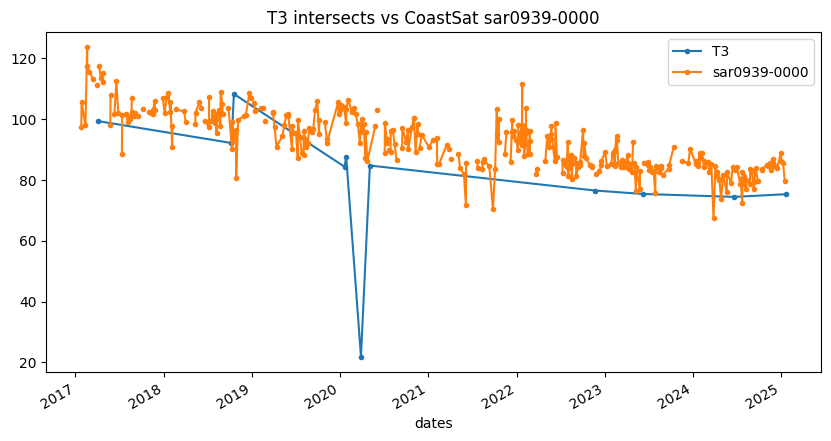

In [11]:
df.index = df.date
ax = df.dist_from_origin[df.site == "T3"].plot(title="T3 intersects vs CoastSat sar0939-0000", label="T3", style=".-", figsize=(10, 5))
cs = pd.read_csv("data/sar0939/transect_time_series.csv")
cs.dates = pd.to_datetime(cs.dates)
cs = cs[cs.dates.between("2017-01-25", "2025-01-20")]
cs.set_index("dates", inplace=True)
(cs["sar0939-0000"] - T3_offset).plot(ax=ax, style=".-")
ax.legend()